In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Item_List.csv')
df.head()

,Date,Carbohydrates,Fiber,Protein,Fat,Item Description,Unit Price
0,3/1/2023,214.2,0.0,0.0,0.00,BLOW BUBBLE GUM 50PCS,RM14.50
1,3/1/2023,1520.0,0.0,80.0,560.00,CHOCO BALL EARTH / GOLD / MIX COLOUR 100PCS,RM7.00
2,3/1/2023,760.0,0.0,40.0,280.00,CHOCO BALL EARTH / GOLD / MIX COLOUR 100PCS,RM7.00
3,3/1/2023,108.1,0.0,0.0,0.00,DRAWING RULER+LOLLIPOP 30PCS,RM8.20
4,3/1/2023,669.6,0.0,446.4,460.35,DUTCH LADY FRESH MILK 450ML,RM3.82


<Axes: xlabel='Date'>

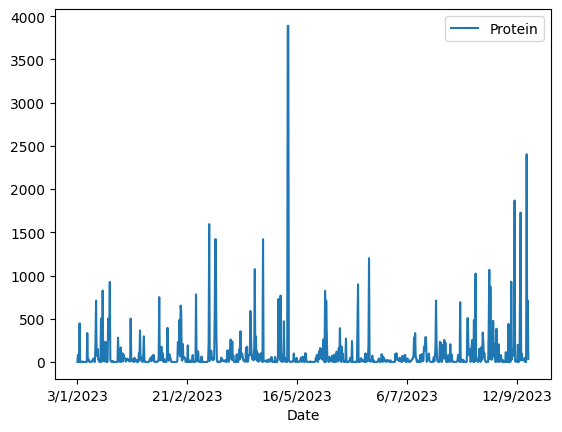

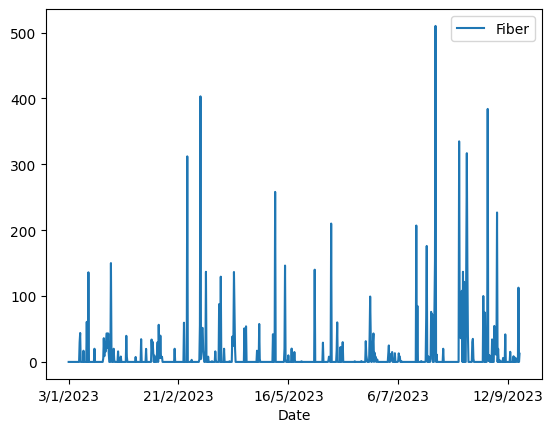

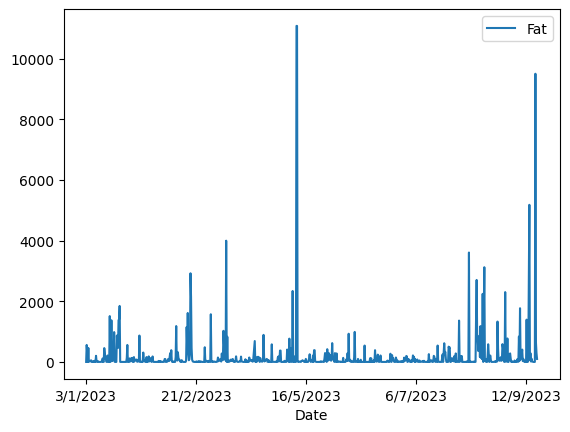

In [17]:
#df.plot("Date","Carbohydrates", kind="line")
df.plot("Date","Protein", kind="line")
df.plot("Date","Fiber", kind="line")
df.plot("Date","Fat", kind="line")


In [15]:
print(f"Total unique items: {df['Item Description'].nunique()}")

x = df['Item Description'].value_counts()
x

#df['Item Description'].value_counts().plot(kind="bar")


Total unique items: 573


Item Description
RICO JELLY CUP 100PCS                      13
SUPER KONJAC JELLY 40PCS                    8
JATI BERAS JELAPANG 10KG                    7
RICO ASSORTED PUDDING 24PCS                 7
RICO UMBRELLA PUDDING 24PCS                 7
                                           ..
WHISKAS OCEAN FISH FLAVOUR 480G 1+YEARS     1
SAJI SOS TOMATO 485G                        1
SAJI SOS CILI 500G                          1
ES SARDINES 400G                            1
M&M 'S CHOCOLATE CANDIES 175.5G             1
Name: count, Length: 573, dtype: int64

In [36]:
df2 = pd.read_csv('Item_FullList.csv')
df2.sample(5)

,Date,Carbohydrates,Fiber,Protein,Fat,Item Description,Item Code,Quantity,Unit Price,Carbohydrates (g),Fiber (g),Protein (g),Fat (g),Total Price
602,23/2/2023,90.00,3.8,15.00,2.50,SAN REMO SPAGHETTI 500G,PKS0709,1,RM4.42,90.00,3.80,15.00,2.50,4.42
724,9/9/2023,299.00,0.0,8.50,53.00,TCC GULA CASTER 1KG,PKS0694,1,RM5.20,299.00,0.00,8.50,53.00,5.20
384,21/9/2023,1443.05,112.7,242.55,634.55,M&M 'S CHOCOLATE CANDIES 175.5G,PKS5053,14,RM12.42,103.08,8.05,17.33,45.33,173.88
189,7/9/2023,150.00,37.5,0.00,0.00,DESA ALPHA NATA DE COCO LYCHEE 1.5KG,PKS3647,1,RM4.90,150.00,37.50,0.00,0.00,4.90
578,3/7/2023,800.00,0.0,0.00,0.00,RICO PUDDING CUP 100PCS,PKS0280,1,RM5.47,800.00,0.00,0.00,0.00,5.47


In [37]:
import pandas as pd
import numpy as np

df2 = pd.read_csv('Weekly_Average_FoodWaste.csv')
df2.head()

,Date,Carbohydrates,Fiber,Protein,Fat,Vitamin
0,2023-01-08,670.82,0.00,97.90,127.36,NaN
1,2023-01-15,618.12,5.38,20.76,27.83,NaN
2,2023-01-22,1204.24,8.48,167.34,232.78,NaN
3,2023-01-29,87.83,0.00,318.67,1542.42,NaN
4,2023-02-05,307.26,15.11,43.99,72.72,NaN


## Plot all nutritions weekly average raw

Text(0, 0.5, 'Nutritrion (gram)')

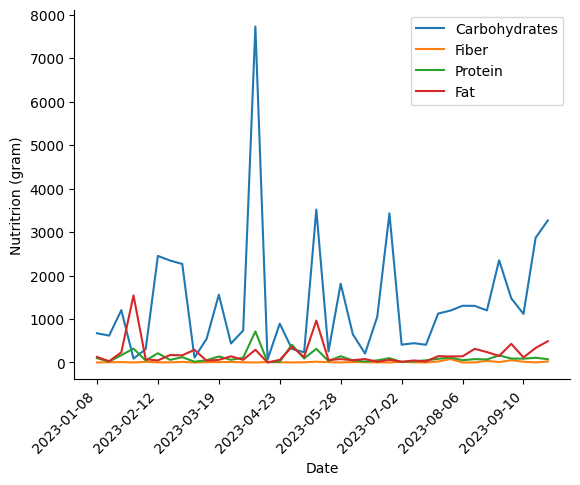

In [38]:
#df2.plot("Date","Carbohydrates", kind="line")
import matplotlib.pyplot as plt

df2 = df2[['Date','Carbohydrates','Fiber','Protein', 'Fat']]

ax = df2.set_index('Date').plot();


#ax=df2.plot("Date","Carbohydrates",kind="line")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Date')
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Nutritrion (gram)')

## Plot all nutritions weekly average normalized

Text(0, 0.5, 'Nutritrion (normalized)')

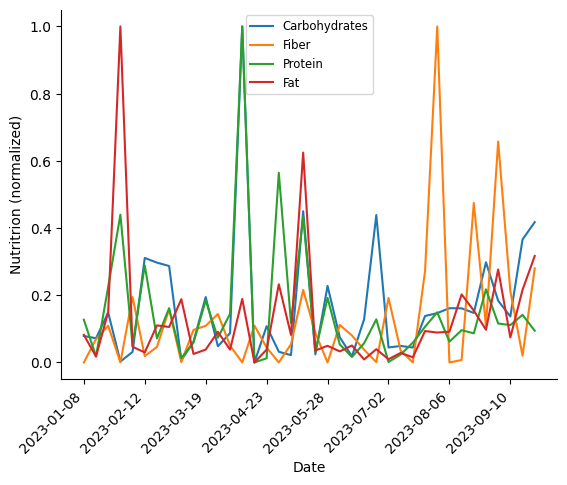

In [39]:
df3 = df2.copy()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[['Carbohydrates','Fiber','Protein', 'Fat']] = scaler.fit_transform(df3[['Carbohydrates','Fiber','Protein', 'Fat']])



ax = df3.set_index('Date').plot();
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper center', fontsize="small")  # Change the position as needed

ax.set_xlabel('Date')
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Nutritrion (normalized)')


"\n    medianprops = {'color': mediancolor, 'linewidth': 2}\n    boxprops = {'color': 'black', 'linestyle': '-'}\n    whiskerprops = {'color': 'black', 'linestyle': '-'}\n    capprops = {'color': 'black', 'linestyle': '-'}\n    flierprops = {'color': 'black', 'marker': 'x'}\n    \n    ax.boxplot(y,\n               positions=x,\n               medianprops=medianprops,\n               boxprops=boxprops,\n               whiskerprops=whiskerprops,\n               capprops=capprops,\n               flierprops=flierprops)\n    \n    ax.set_xlim(xlims)\n    ax.set_ylim(ylims)\n"

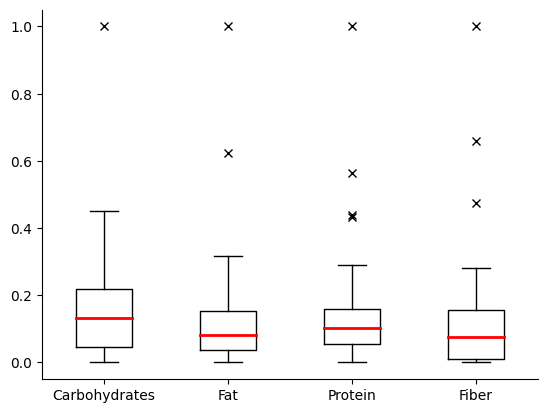

In [48]:
ax = df3.boxplot(column=["Carbohydrates","Fat","Protein","Fiber"],
                 medianprops = {'color': "red", 'linewidth': 2},
                boxprops = {'color': 'black', 'linestyle': '-'},
                whiskerprops = {'color': 'black', 'linestyle': '-'},
                capprops = {'color': 'black', 'linestyle': '-'},
                flierprops = {'color': 'black', 'marker': 'x'},
                grid = False
)


#ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlabel('Formatted agreed mark')
#ax.set_ylabel('Number of students')
    
#yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
#yticklabels = yticks
    
ax.get_tightbbox()
'''
    medianprops = {'color': mediancolor, 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-'}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    
    ax.boxplot(y,
               positions=x,
               medianprops=medianprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               flierprops=flierprops)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
'''


## Merged dataset

In [28]:
df_master = pd.read_csv('Item_FullList.csv')

# exclude one column
#df_master = df_master.loc[:, df_master.columns != 'Item Code']

df_master = df_master[["Date","Item Description","Quantity","Unit Price","Carbohydrates (g)","Fat (g)","Protein (g)", "Fiber (g)","Total Price"]]

print(df_master.info())
df_master.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               822 non-null    object 
 1   Item Description   822 non-null    object 
 2   Quantity           822 non-null    int64  
 3   Unit Price         822 non-null    object 
 4   Carbohydrates (g)  822 non-null    float64
 5   Fat (g)            822 non-null    float64
 6   Protein (g)        822 non-null    float64
 7   Fiber (g)          822 non-null    float64
 8   Total Price        822 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 57.9+ KB
None


,Date,Item Description,Quantity,Unit Price,Carbohydrates (g),Fat (g),Protein (g),Fiber (g),Total Price
443,7/2/2023,MOTOKAR SERBUK LADA HITAM 100G,3,RM5.70,66.00,3.50,10.60,2.5,17.10
403,16/2/2023,MARIGOLD KRIMER SEJAT 390G,14,RM3.06,42.12,32.76,14.82,0.0,42.84
472,9/9/2023,ORI BIS BERKRIM STRAW 4808 630G,5,RM6.20,75.00,18.00,5.70,1.2,31.00
25,12/8/2023,ADABI NASI GORENG IKAN BILIS 17G,2,RM0.98,16.05,0.27,2.57,0.0,1.96


<Axes: >

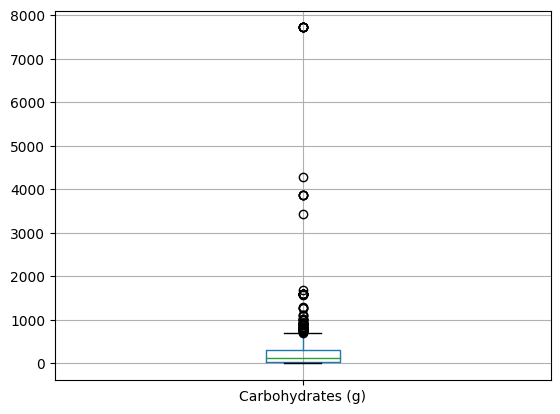

In [31]:
df_master.boxplot(column="Carbohydrates (g)")

## Plot GPR forecast

c:\Users\shahr\code\.mlenv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


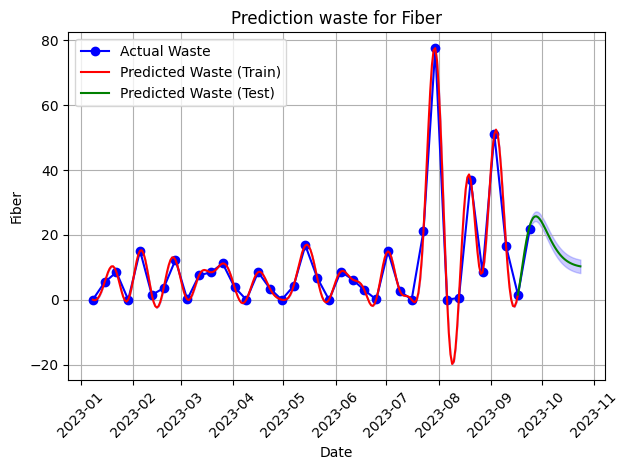

In [10]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C
from sklearn.metrics import mean_squared_error
import joblib
from datetime import datetime, timedelta

# Read data
#df = pd.read_csv(r'D:\Bachelor of Computer Science (Artificial Intelligence)\FYP\src\Weekly_Average_FoodWaste.csv')
df = pd.read_csv(r'Weekly_Average_FoodWaste.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the chosen category for plotting
chosen_category = 'Fiber'
# print(df[chosen_category])

# Filter the data for the chosen category
selected_columns = ['Date', chosen_category]
filtered_data = df[selected_columns]
# print(filtered_data)

split_ratio = 0.97 # 0.93 = 2 points (test data)
split_index = int(len(filtered_data) * split_ratio)
df_train = filtered_data[:split_index+1]
df_test = filtered_data[split_index:]

start = filtered_data['Date'].min()
end = filtered_data['Date'].max()
range_datetime = (end - start).days

# Normalize date and waste variables
reference_date = datetime(2023, 1, 1)
normalized_date = (df_train['Date'] - reference_date).dt.days.values.reshape(-1, 1) / range_datetime
normalized_waste = df_train[chosen_category].values.reshape(-1, 1) / np.max(filtered_data[chosen_category])
X = normalized_date
y = normalized_waste    

# Normalize date and waste variables
normalized_date_range = (df_test['Date'] - reference_date).dt.days.values.reshape(-1, 1) / range_datetime
normalized_waste_range = df_test[chosen_category].values.reshape(-1, 1) / np.max(df_train[chosen_category])

X_train_ =  normalized_date
X_test_ =  normalized_date_range


#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Gaussian stuff starts here 

# Define different kernels
kernel_rbf = RBF(length_scale=20 ) #+ WhiteKernel(noise_level=10)
kernel_matern = Matern(length_scale=2.4, nu=5 ) #length_scale=2, nu=1.05, sigma=1 / length_scale=2.4, nu=1.03, sigma=2 / length_scale=2.4, nu=5 , split = 0.97
kernel_combined = kernel_rbf + kernel_matern

# Create Gaussian Process with different kernels
model = GaussianProcessRegressor(kernel=kernel_combined, n_restarts_optimizer=10)

# Fit the Gaussian Processes for the current category
model.fit(X, y)
model_params = model.get_params()

#prediction for train data
start_date = df_train['Date'].min()
end_date =   df_train['Date'].max() 
date_train = pd.date_range(start=start_date, end=end_date, freq='D')

# Normalize the date range
normalized_date_train = (date_train - reference_date).days / range_datetime
X_train = normalized_date_train.values.reshape(-1, 1)

#---------------------------------------------------------------------------
# Make predictions for the date range using the GP model
y_pred_train, sigma_range_train = model.predict(X_train, return_std=True)

# Denormalize the predicted wastes
predicted_waste_train = y_pred_train * np.max(filtered_data[chosen_category])

###predict for test data
start_dates = df_test['Date'].min()
end_dates =   df_test['Date'].max()+ timedelta(days=30)
date_test = pd.date_range(start=start_dates, end=end_dates, freq='D')

# Normalize the date range
normalized_date_test = (date_test - reference_date).days / range_datetime
X_test = normalized_date_test.values.reshape(-1, 1)

# Make predictions for the date range using the GP model
y_pred_test, sigma_range_test = model.predict(X_test, return_std=True)

# Denormalize the predicted wastes
predicted_waste_test = y_pred_test * np.max(filtered_data[chosen_category])


# Visualization
plt.plot(filtered_data['Date'], filtered_data[chosen_category], marker='o' ,c='blue', label='Actual Waste')
plt.plot(date_train, predicted_waste_train, 'r', label='Predicted Waste (Train)')
plt.plot(date_test, predicted_waste_test, c='green', markersize=8, label='Predicted Waste (Test)')
plt.fill_between(date_train.ravel(),predicted_waste_train - 2 * sigma_range_train, predicted_waste_train + 2 * sigma_range_train, alpha=0.2, color='b')
plt.fill_between(date_test.ravel(),predicted_waste_test - 2 * sigma_range_test, predicted_waste_test + 2 * sigma_range_test, alpha=0.2, color='b')
plt.xlabel('Date')
plt.ylabel(chosen_category)
plt.title(f'Prediction waste for {chosen_category}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



